# Análisis preliminar bioma eukaryota

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pcolors
from sklearn import preprocessing
from sklearn import metrics
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

## Lectura de datos
### Número de lecturas

Vamos a considerar solamente auqellos estudios que tienen un número de lecturas tras la limpieza mayor del umbral

In [46]:
umbral = 1_200_000

In [47]:
ttable = pd.read_csv('data/concat_track_table.tsv', sep='\t', index_col='Sample')

In [48]:
valid = ttable[ttable.bowtie >= umbral].index.to_list()

### Tabla de conteos

In [49]:
# Carga el dataset
df = pd.read_csv('data/presence_absence_genus_table.tsv', sep='\t', index_col='Sample')

In [50]:
df.columns

Index(['4930', '4910', '5073', '12967', '29832', '13366', '4958', '5740',
       '4919', '4895', '5758', '5052', '79922', '507510', '4838', '688353',
       '13705', '1535326', '55193', '604195', '33196', '6953', '5340', '38944',
       '5269', '265084', '5598', '231006', '1052105', '4948', '45234',
       '374468', '5579', '71245', '311780', '6237', '1910789', '5552', '5475',
       '5583', '36910', '51027', '47182', '5533', '45787', '5806', '95601',
       '64644', '6181', '52429', '34622', '2849', '43971', '4953', '766728',
       '476763', '77850', '5027', '148959', '36913', '300275', '599737',
       '4842'],
      dtype='object')

In [51]:
df

,4930,4910,5073,12967,29832,13366,4958,5740,4919,4895,...,4953,766728,476763,77850,5027,148959,36913,300275,599737,4842
Sample,,,,,,,,,,,,,,,,,,,,,
SAMEA2041939,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMEA2042005,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMEA2041924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMEA1964895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMEA2042001,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR260266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ERR260260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ERR260234,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Limpieza de datos de presencia/ausencia

Para limpiar los datos utilizaremos los siguientes criterios:
 - Elimar los estudios cuyo número de secuencias está por debajo del umbral. 
 - Eliminamos todas las filas que no contienen ninguna eukaryota.
 - Eliminar los taxones que no aparecen en ningua muestra.

In [52]:
# Número de lecturas por debajo del umbral
df = df.loc[valid]
df

,4930,4910,5073,12967,29832,13366,4958,5740,4919,4895,...,4953,766728,476763,77850,5027,148959,36913,300275,599737,4842
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11070334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR13336903,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR13336940,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR13336941,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Filas que no contienen ninguna eukaryota
df = df[df.sum(axis=1) > 0]
df

,4930,4910,5073,12967,29832,13366,4958,5740,4919,4895,...,4953,766728,476763,77850,5027,148959,36913,300275,599737,4842
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11070348,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070365,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070366,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070368,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070369,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR13336903,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR13336940,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR13336941,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Taxones que no aparecen en ningua muestra
print('Antes:', len(df.columns), end=',')
df = df.loc[:, df.sum(axis=0) > 0]
print(' Despues:', len(df.columns))

Antes: 63, Despues: 63


In [7]:
# Normalización
scaler = preprocessing.StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

### Metadatos

In [55]:
md = pd.read_csv('data/GLOBAL_METADATA.csv', sep='\t', index_col='file_sample_name')

In [56]:
md

,run_accession,sample_accession,study_accession,study_code,SampleID,instrument_model,DNA_extraction_kit,individual,country,region,...,host_age_group,host_sex,host_BMI,host_diet,host_ethnicity,familyID,family_level,sibling_twins,twin_type,pregnancy_status
file_sample_name,,,,,,,,,,,,,,,,,,,,,
SRR7658579,SRR7658579,SAMN09781768,PRJNA485056,Pasolli2019,A55_01_1FE,Illumina HiSeq 2500,Qiagen,A55_01_1FE,Madagascar,North-eastern Madagascar,...,Adult,Female,22.31,NaN,NaN,NaN,NaN,No,NaN,NaN
SRR7658580,SRR7658580,SAMN09781769,PRJNA485056,Pasolli2019,V12_01_2FE,Illumina HiSeq 2500,Qiagen,V12_01_2FE,Madagascar,North-eastern Madagascar,...,Adult,Male,21.11,NaN,NaN,NaN,NaN,No,NaN,NaN
SRR7658581,SRR7658581,SAMN09781764,PRJNA485056,Pasolli2019,A32_01_1FE,Illumina HiSeq 2500,Qiagen,A32_01_1FE,Madagascar,North-eastern Madagascar,...,Adult,Male,21.51,NaN,NaN,NaN,NaN,No,NaN,NaN
SRR7658582,SRR7658582,SAMN09781765,PRJNA485056,Pasolli2019,A94_01_1FE,Illumina HiSeq 2500,Qiagen,A94_01_1FE,Madagascar,North-eastern Madagascar,...,Adult,Male,23.44,NaN,NaN,NaN,NaN,No,NaN,NaN
SRR7658583,SRR7658583,SAMN09781766,PRJNA485056,Pasolli2019,A39_04_1FE,Illumina HiSeq 2500,Qiagen,A39_04_1FE,Madagascar,North-eastern Madagascar,...,Adult,Male,22.48,NaN,NaN,NaN,NaN,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HV5,ERR527040,SAMEA2582012,PRJEB6337,Qin2014,HV5_Run4,Illumina HiSeq 2000,NaN,HV5,China,NaN,...,Adult,Male,23.53,NaN,NaN,NaN,NaN,No,NaN,NaN
HV6,ERR527041,SAMEA2582013,PRJEB6337,Qin2014,HV6_Run4,Illumina HiSeq 2000,NaN,HV6,China,NaN,...,Adult,Male,23.94,NaN,NaN,NaN,NaN,No,NaN,NaN
HV7,ERR527042,SAMEA2582014,PRJEB6337,Qin2014,HV7_Run4,Illumina HiSeq 2000,NaN,HV7,China,NaN,...,Elder,Male,22.77,NaN,NaN,NaN,NaN,No,NaN,NaN


In [57]:
todo = df.merge(md, left_index=True, right_index=True)

### Metadatos taxonómicos

In [58]:
taxa = pd.read_csv('data/taxonomy_genus_table.tsv', sep='\t', index_col='TaxID')
taxa

,phylum,class,order,family,genus
TaxID,,,,,
4930,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Saccharomyces
4910,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Kluyveromyces
5073,Ascomycota,Eurotiomycetes,Eurotiales,Aspergillaceae,Penicillium
12967,NaN,Bigyra,Opalinata,Blastocystidae,Blastocystis
29832,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycodaceae,Hanseniaspora
...,...,...,...,...,...
148959,Basidiomycota,Wallemiomycetes,Wallemiales,Wallemiaceae,Wallemia
36913,Ascomycota,Saccharomycetes,Saccharomycetales,Debaryomycetaceae,Lodderomyces
300275,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Lachancea


## PCA

In [12]:
# PCA...
pca = decomposition.PCA(n_components=2)
Y_sklearn = pca.fit_transform(df.T)
print("Analisis del PCA:")
#print('   Components:', pca.components_)
print('   Explained variance:', pca.explained_variance_)
print('   Explained Var Ratio:', pca.explained_variance_ratio_)

Analisis del PCA:
   Explained variance: [113.21300565  89.34893526]
   Explained Var Ratio: [0.05454046 0.04304392]


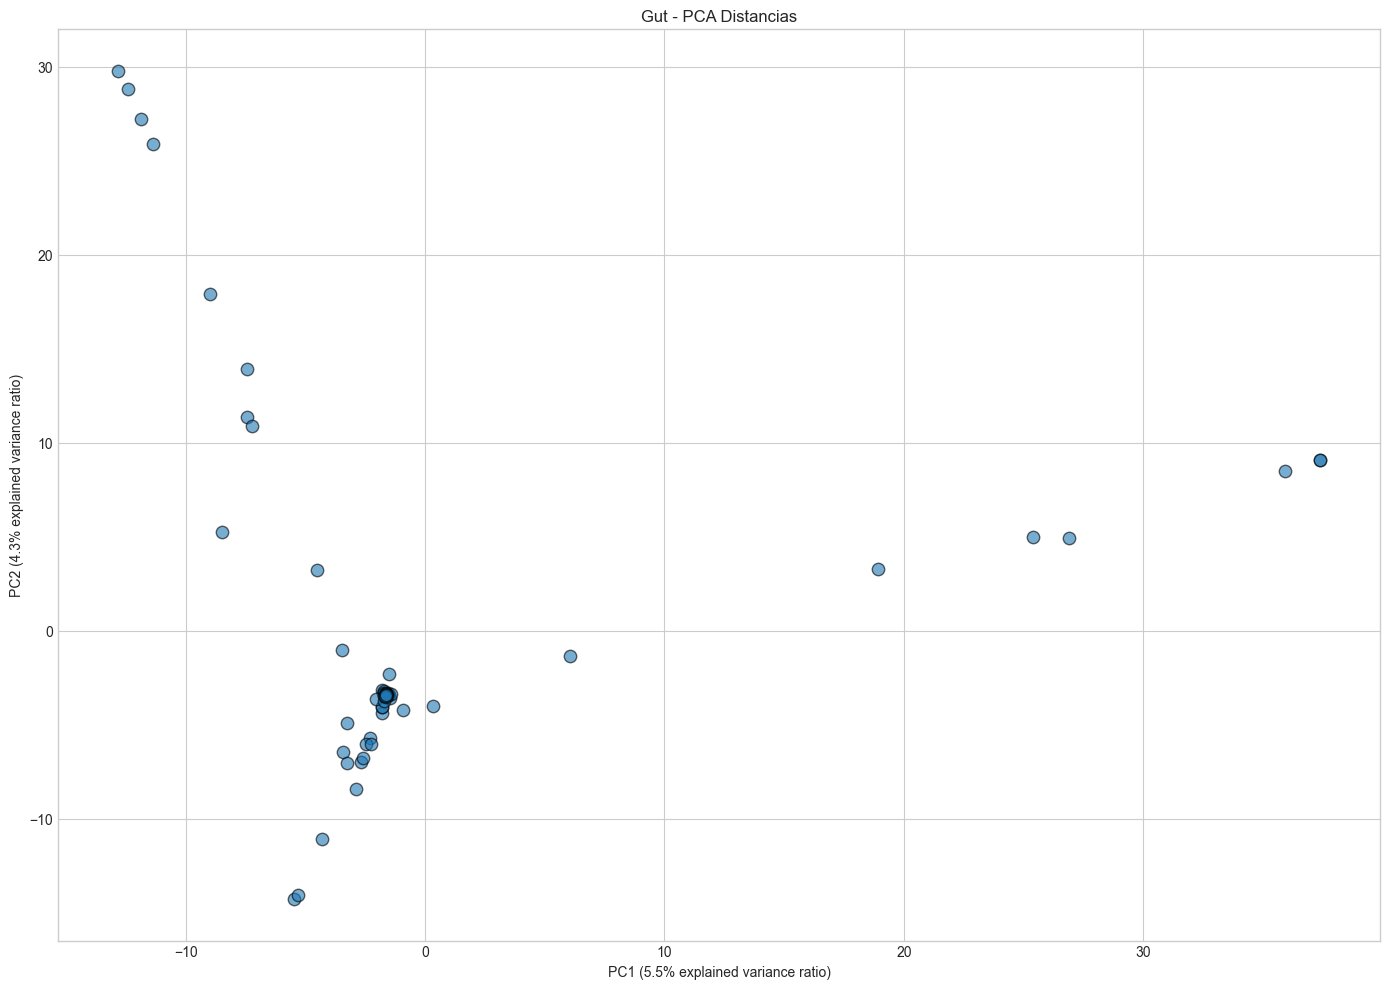

In [13]:
# Gráfica del PCA
#
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(14,10))
    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], s=80, edgecolor='black', alpha=0.6)

    pc = 100.0 * pca.explained_variance_ratio_
    plt.xlabel('PC1 (%.1f%% explained variance ratio)' % pc[0])
    plt.ylabel('PC2 (%.1f%% explained variance ratio)' % pc[1])
    plt.title('Gut - PCA Distancias')
    #plt.legend(loc='best', frameon=True, shadow=False)
    plt.tight_layout()
    #plt.savefig('pca_genero_distance_continent.pdf')
    plt.show()
#endwith

## Heatmap con nombre de genus...

In [59]:
# Cambia el número de columna por nombre de genus...
taxid = taxa.index.to_list()
taxid = [str(t) for t in taxid]
genus = taxa.genus.to_list()
torename = dict(zip(taxid, genus))

In [60]:
dfr = df.rename(columns=torename)
dfr

,Saccharomyces,Kluyveromyces,Penicillium,Blastocystis,Hanseniaspora,Brettanomyces,Debaryomyces,Giardia,Pichia,Schizosaccharomyces,...,Zygosaccharomyces,Meyerozyma,Rhinocypha,Kodamaea,Pyrenophora,Wallemia,Lodderomyces,Lachancea,Wickerhamomyces,Rhizopus
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11070348,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070365,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070366,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070368,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070369,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR13336903,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR13336940,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR13336941,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#cbar = {-1.0:'Very strong(-)', -0.80:'Strong (-)', -0.6:'Moderate (-)', -0.4:'Weak (-)', -0.2:'Very weak (-)', 0.2:'Very weak (+)', 0.4:'Weak (+)', 0.6:'Moderate (+)', 0.8:'Strong (+)', 1.0:'Very strong (+)'}
cbar = {'Very strong(-)':-1, 'Strong (-)':-0.8, 'Moderate (-)':-0.6, 'Weak (-)':-0.4, 'Very weak (-)':-0.2, 'Very weak (+)':0.2, 'Weak (+)':0.4, 'Moderate (+)':0.6, 'Strong (+)':0.8, 'Very strong (+)':1}

In [95]:
pcorr = dfr.corr()

In [140]:
#bins = [-1.0, -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1.0]
#labels = ['Very strong(-)', 'Strong (-)', 'Moderate (-)', 'Weak (-)', 'Very weak (-)', 'Very weak (+)', 'Weak (+)', 'Moderate (+)', 'Strong (+)', 'Very strong (+)']
bins = [-0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Weak (-)', 'Very weak (-)', '0.0', 'Very weak (+)', 'Weak (+)', 'Moderate (+)', 'Strong (+)', 'Very strong (+)']

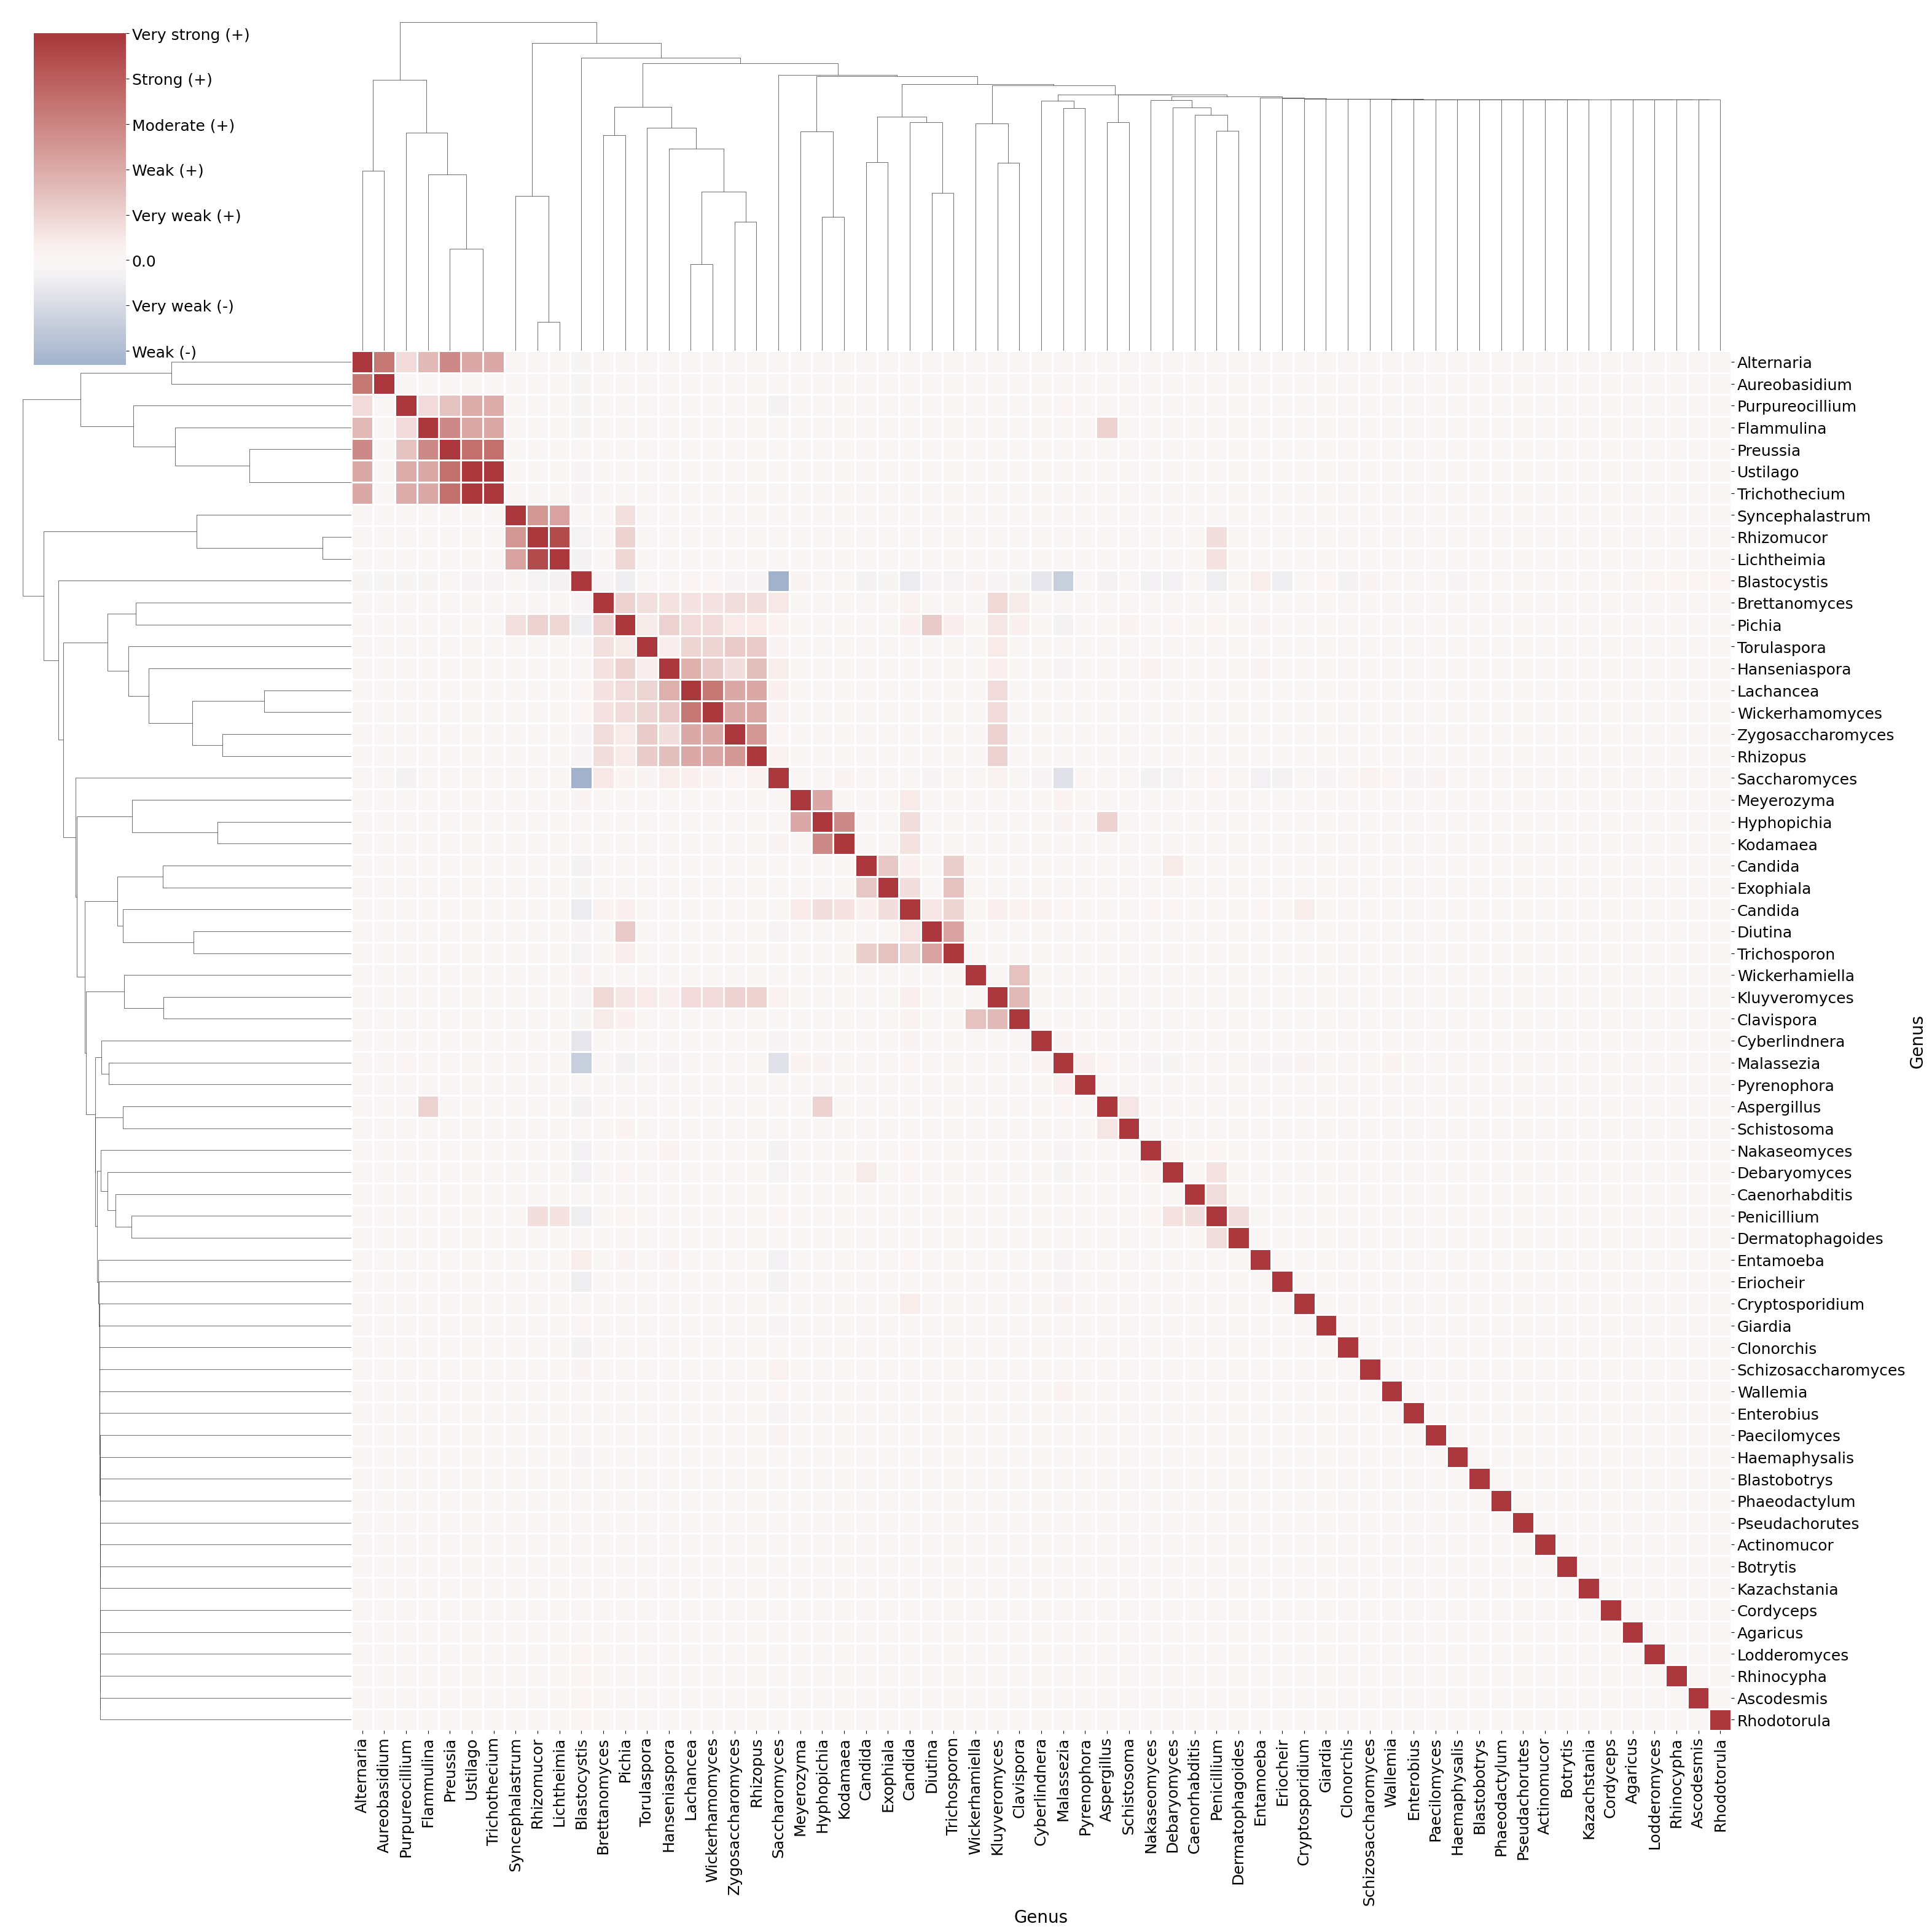

In [142]:
#g = sns.clustermap(dfr.corr(), center=0, cmap="YlGnBu", linewidths=.75, figsize=(30, 30))
g = sns.clustermap(dfr.corr(), center=0, cmap="vlag", linewidths=.75, figsize=(30, 30), metric='euclidean')

plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=18)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=18)  # For x axis

#cbar = plt.getp(g.ax_cbar)
fig = g.figure
cbar = g.ax_cbar
#cbar = fig.colorbar(g.cax, ticks=bins, orientation='vertical')
cbar.set_yticks(bins)
cbar.set_yticklabels(labels, fontsize=18)  # horizontal colorbar
#plt.setp(g.cbar(cbar))

g.ax_heatmap.set_xlabel('Genus', fontsize=20)
g.ax_heatmap.set_ylabel('Genus', fontsize=20)
#plt.title("Genus correlation")
g.savefig('heatmap_genus.pdf')
plt.show()
plt.close()